<a href="https://colab.research.google.com/github/SankeerthShabad/IDS/blob/main/HW5/Problem1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Linear Regression

In [25]:
# Importing dataframe

library(readr)

CompanyDF <- read_csv("https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv")

Rows: 200 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): TV, Radio, Newspaper, Sales

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [26]:
# Printing head of CompanyDF

head(CompanyDF)

TV,Radio,Newspaper,Sales
<dbl>,<dbl>,<dbl>,<dbl>
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,12.0
151.5,41.3,58.5,16.5
180.8,10.8,58.4,17.9
8.7,48.9,75.0,7.2


### In CompanyDF, we can see that there are four columns: TV, Radio, Newspaper, and Sales.

# Summary of CompanyDF

In [27]:
#Summary of CompanyDF

summary(CompanyDF)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

### Within the Columns of companyDF, we can discover the Min, Median, Mean, Max, and Quartiles of the data. We can observe that television has the greatest mean and median, whereas sales have the lowest.

# Examine Correlations

In [28]:
# Let’s compute the standard correlation coefficient (Pearson’s r) between pairs of attributes
# to determine which parameter has the greatest correlation with Sales

corr_matrix = cor(CompanyDF,method = "pearson")
corr_matrix

print(corr_matrix[4,])

,TV,Radio,Newspaper,Sales
TV,1.00000000,0.05480866,0.05664787,0.9012079
Radio,0.05480866,1.00000000,0.35410375,0.3496311
Newspaper,0.05664787,0.35410375,1.00000000,0.1579600
Sales,0.90120791,0.34963110,0.15796003,1.0000000


       TV     Radio Newspaper     Sales 
0.9012079 0.3496311 0.1579600 1.0000000 


### We created column correlations in CompanyDF and identified the highest sales correlation parameters, after which we got the numbers.

# CompanyDF's boxplot.

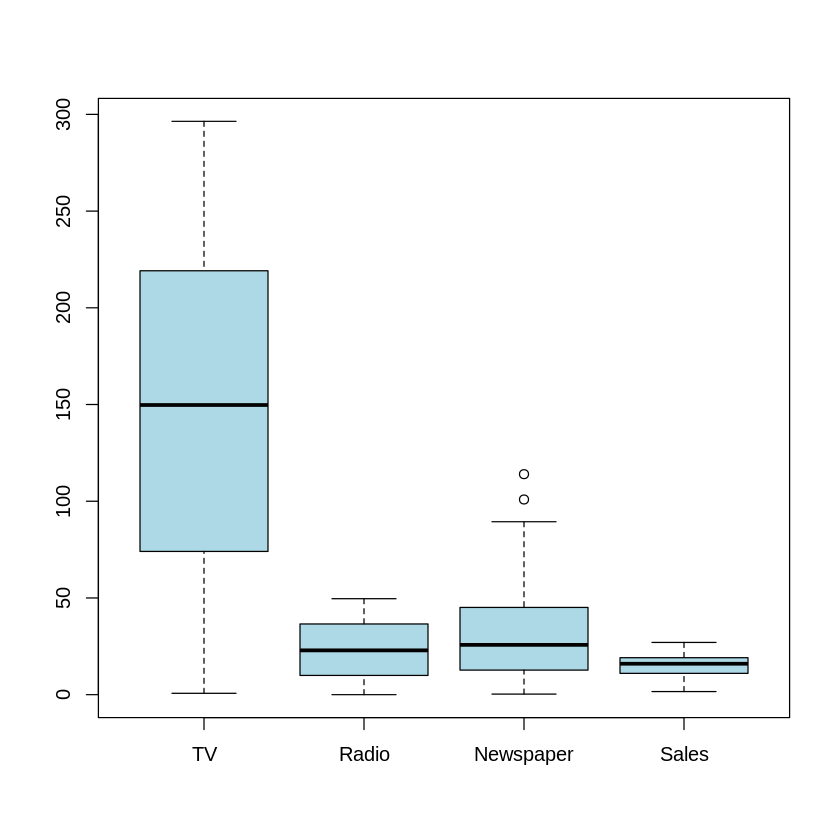

In [29]:
#boxplot of CompanyDF

boxplot(CompanyDF, col="light blue")

### We can see from the above boxplot that television has a broader range of values than sales, but radio and newspapers have roughly the same range of values and newspaper has two outliers in the upper bound.

# Ploting Histogram and density

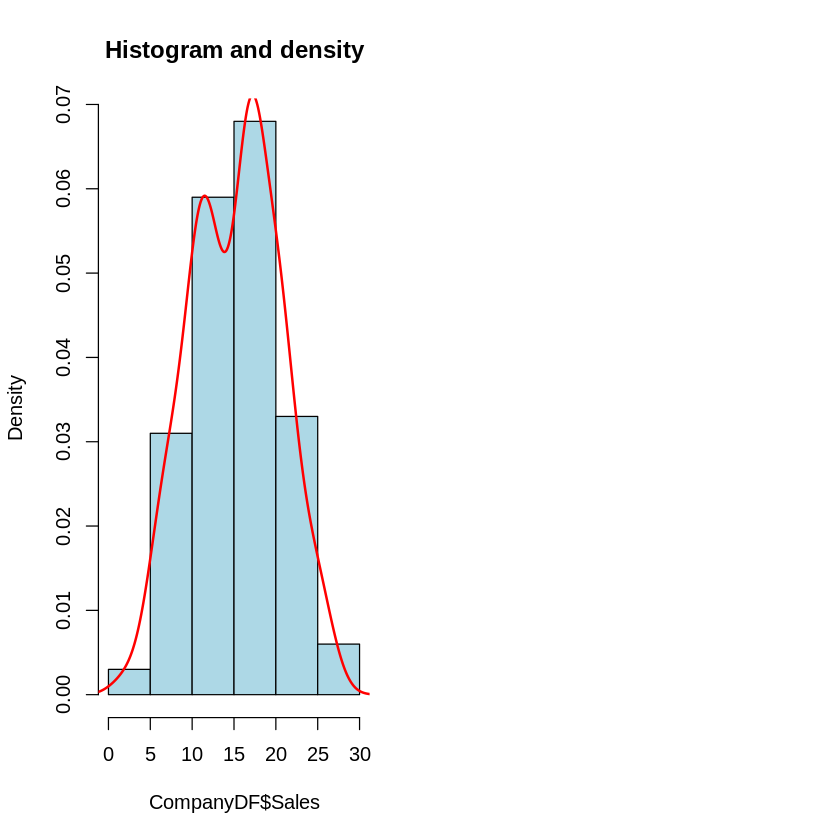

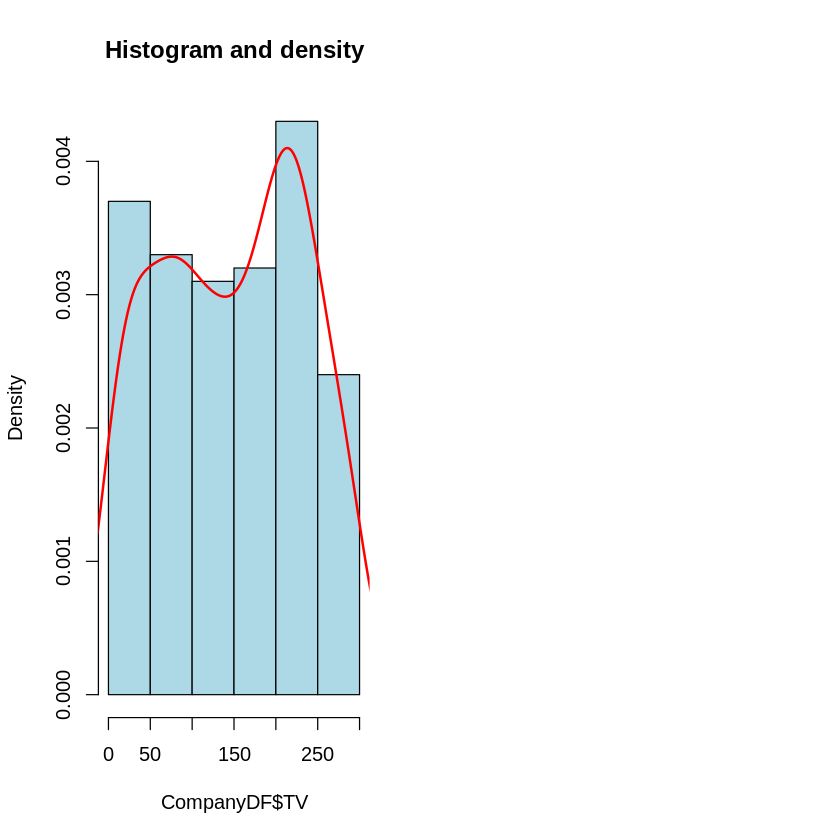

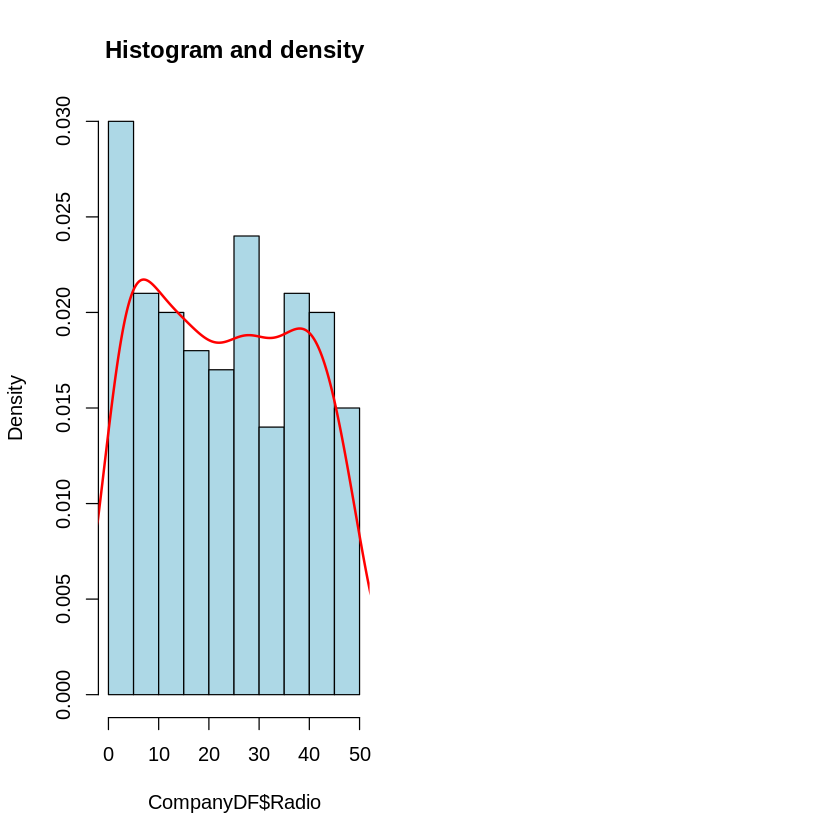

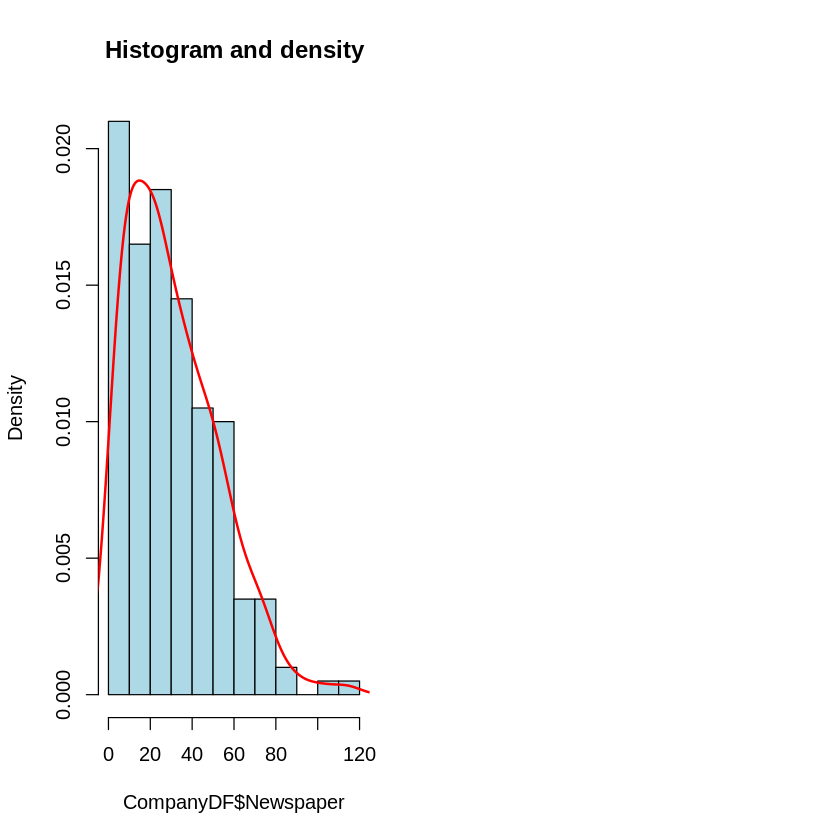

In [30]:
# ggplot2 library for ploting histogram

library(ggplot2)  

# histogram and density plot for Sales
par(mfrow = c(1, 2))

# Create a histogram
hist(CompanyDF$Sales, freq = FALSE, main = "Histogram and density", col = "light blue")

# Calculate density
dx <- density(CompanyDF$Sales)

# Add density
lines(dx, lwd = 2, col = "red")

# histogram and density plot for TV
par(mfrow = c(1, 2))

# Create a histogram
hist(CompanyDF$TV, freq = FALSE, main = "Histogram and density", col = "light blue")

# Calculate density
dx <- density(CompanyDF$TV)

# Add density
lines(dx, lwd = 2, col = "red")

# histogram and density plot for Radio
par(mfrow = c(1, 2))

# Create a histogram
hist(CompanyDF$Radio, freq = FALSE, main = "Histogram and density", col = "light blue")

# Calculate density
dx <- density(CompanyDF$Radio)

# Add density
lines(dx, lwd = 2, col = "red")

#histogram and density plot for Newspaper
par(mfrow = c(1, 2))

# Create a histogram
hist(CompanyDF$Newspaper, freq = FALSE, main = "Histogram and density", col = "light blue")

# Calculate density
dx <- density(CompanyDF$Newspaper)

# Add density
lines(dx, lwd = 2, col = "red")


### From the above histograms of columns in CompanyDF, we can observe that sales ranges are appropriately skewed, television ranges are slightly to the right, radio values have multiple skewing, and newspaper ranges are completely left skewed.

# Checking for missing values

In [31]:
# checking for null values

sum(is.na(CompanyDF))

[1] 0

### There are no missing values in CompanyDF

# Scatter plot for TV, Radio, Newspaper

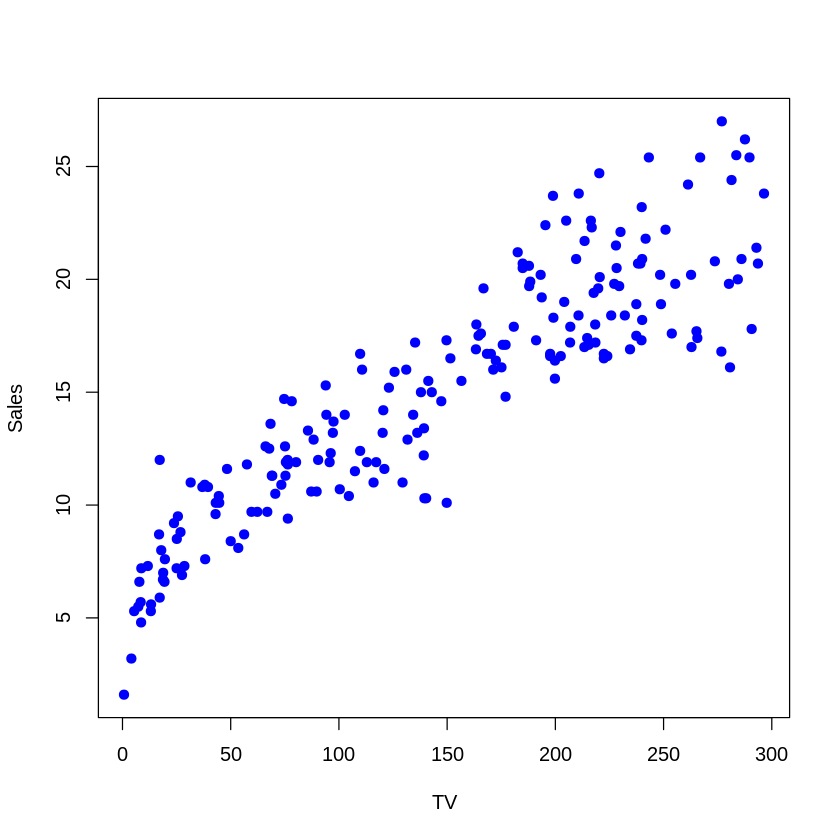

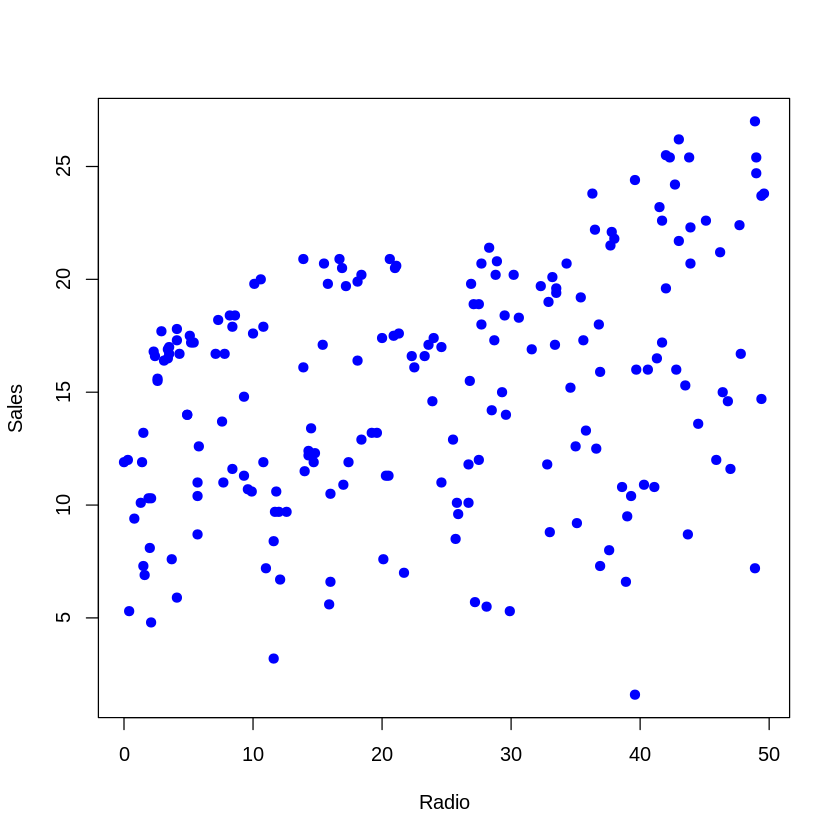

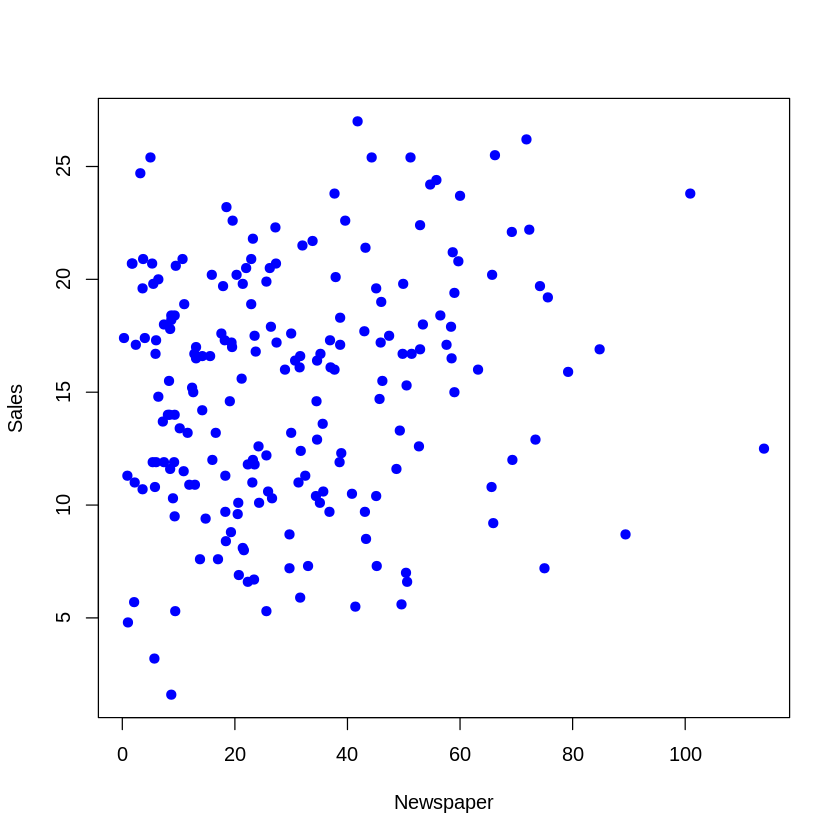

In [32]:
# Scatter plot for TV 

plot(Sales ~ TV , data = CompanyDF, pch = 19, col = "blue")

# Scatter plot for Radio

plot(Sales ~ Radio , data = CompanyDF, pch = 19, col = "blue")

# Scatter plot for  Newspaper

plot(Sales ~ Newspaper , data = CompanyDF, pch = 19, col = "blue")


### We can see from the scatter plots above that sales and television have a strong, positive linear relationship, whereas radio and newspapers have a null or less linear relationship with sales.

# Linear model using entire Data set for training

In [33]:
# To find intercept and slope 

x=CompanyDF$Sales
y=CompanyDF$TV

lm1 <- lm(x ~ y, data = CompanyDF,)

cat(" Intercept"," Slope \n",lm1$coefficients)


 Intercept  Slope 
 6.974821 0.05546477

### We can observe that the intercept is 6.9 and the slope is 0.055 after running a linear model of Sales and TV using data from CompanyDF.
### Sales= 6.97 + 0.05*TV

# R2 score and Mean Squared Error

In [34]:
#  R2 score and MSE 

cat("R2 score:",summary(lm1)$r.squared,"\n")
cat("MSE:",mean(lm1$residuals^2)) 

R2 score: 0.8121757 
MSE: 5.217744

### R2 score is 0.81 and MSE is 5.2

# Installing package CARET

In [35]:
# Package caret for performing linear regression

install.packages("caret")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Dividing data into Train set and Test set

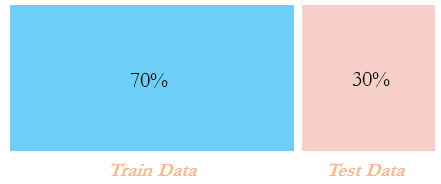

In [36]:
# Dividing data to test and train 

library(caret)
set.seed(130)
dt <- createDataPartition(y=CompanyDF$Sales, p = 0.7,list = FALSE,)
train<-CompanyDF[dt,]
test<-CompanyDF[-dt,]


### Data in the CompanyDF is split into two categories: test and training. In CompanyDF, 70% of data is allotted to train, while 30% is assigned to test. To begin, all of the values have been scrambled.

# using dim() to examine train and set

In [37]:
# Dim of train

dim(train)



[1] 141   4

In [38]:
# Dim of test

dim(test)

[1] 59  4

### Because R indexes from 1, we can see that the train set has 141 columns and the test set has 59. For train and test, the four columns are suffled and split in a 70:30 ratio.

# Linear model after training data of Sales and TV

In [39]:
# Finding intercept and slope

lm12 <- lm(Sales ~ TV, data = train,)

cat(" Intercept"," Slope \n",lm12$coefficients)

 Intercept  Slope 
 6.706025 0.05799726

### We can observe that the intercept is 6.9 and the slope is 0.055 after running a linear model of Sales and TV using train data.
### Sales= 6.7 + 0.05*TV

# R2 score and Mean Squared Error

In [40]:
#R2 score and MSE

cat("R2 score:",summary(lm12)$r.squared,"\n")
cat("MSE:",mean(lm12$residuals^2)) 

R2 score: 0.8078914 
MSE: 5.784546

### R2 score is 0.807 and MSE is 5.78

## **Summary**

* Model trained and tested on the entire data set of 200 cases: 
> **Sales = 6.97 + 0.05 * TV**    

* Model trained on 70% of the data and tested on 30% of the data: 
> **Sales = 6.7 + 0.05 * TV**


We can see that a model that is trained and tested on the whole data set of 200 examples is marginally better than a model that is 70% trained and 30% tested.

# Plotting for the most accurate linear model Sales and TV

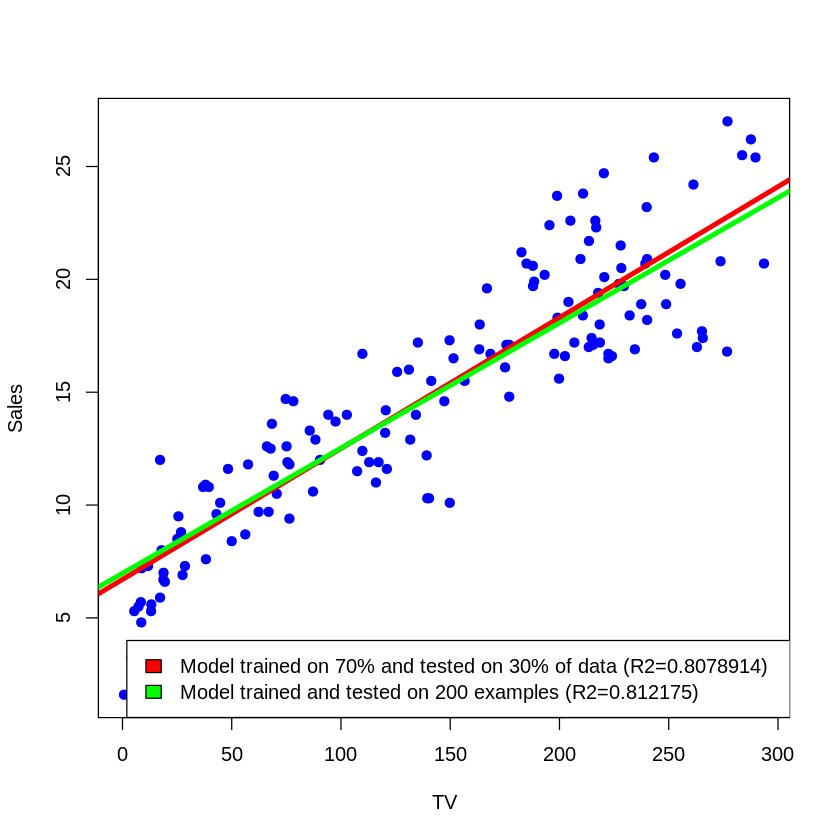

In [41]:
# plot the best fit linear models Sales vs TV

coefs <- coef(lm12)
coefs1 <- coef(lm1)
plot(Sales ~ TV, data = train,pch = 19,col="blue")
abline(coefs, col="red",lwd=4,)
abline(coefs1, col="green",lwd=4,)
legend(2, 4, legend=c("Model trained on 70% and tested on 30% of data (R2=0.8078914)","Model trained and tested on 200 examples (R2=0.812175)"),fill = c("red","green"))


### We can see from the plots above that there is no significant difference between the model trained and tested in 200 data and the model trained on 70% and tested on 30% data.

# Sales vs. (TV, Radio, Newspaper)

# Plotting for the most accurate linear model Sales and (TV,Radio,Newspaper)

In [42]:
# To find intercept, slope, R2 score and MSE 

lm2 = lm(Sales~(TV + Radio + Newspaper), data = train)
lm2$coefficients
cat("R2 score:",summary(lm2)$r.squared,"\n")
cat("MSE:",mean(lm2$residuals^2)) 


(Intercept)          TV       Radio   Newspaper 
4.110303503 0.056432259 0.114423326 0.002200222

R2 score: 0.9091161 
MSE: 2.736588

# Linear model before training data of Sales and (TV,Radio,Newspaper)

In [43]:
# To find intercept, slope, R2 score and MSE 

train_x=CompanyDF$Sales
train_y=CompanyDF$TV+ CompanyDF$Radio + CompanyDF$Newspaper

lm3 <- lm(x ~ train_y, data = CompanyDF,)

cat(" Intercept"," Slope \n",lm3$coefficients,"\n")

cat("R2 score:",summary(lm3)$r.squared,"\n")
cat("MSE:",mean(lm3$residuals^2))

 Intercept  Slope 
 4.573573 0.0525585 
R2 score: 0.8554715 
MSE: 4.014991

### We can observe that the intercept is 4.57 and the slope is 0.052 after running a linear model of Sales and (TV,Radio,Newspaper) using data from CompanyDF. And R2 score is 0.85 and MSE is 4.01

# Linear model after training data of Sales and (TV,Radio,Newspaper)

In [44]:
# To find intercept, slope, R2 score and MSE 

x_train= train$Sales
y_train= train$TV+train$Radio+train$Newspaper
lm4 <- lm(x_train ~ y_train, data = train,)

cat(" Intercept"," Slope \n",lm4$coefficients,"\n")
cat("R2 score:",summary(lm4)$r.squared,"\n")
cat("MSE:",mean(lm4$residuals^2))

 Intercept  Slope 
 4.165785 0.0550648 
R2 score: 0.8618543 
MSE: 4.15968

### We can observe that the intercept is 4.16 and the slope is 0.055 after running a linear model of Sales and (TV,Radio,Newspaper) using data from CompanyDF. And R2 score is 0.86 and MSE is 4.15

## **Summary**

* Model trained and tested on the entire data set of 200 cases: 
> **Sales = 4.57 + 0.05 * TV**    

* Model trained on 70% of the data and tested on 30% of the data: 
> **Sales = 4.16 + 0.05 * TV**


We can see that a model that is trained and tested on the whole data set of 200 examples is marginally better than a model that is 70% trained and 30% tested.

# Plotting for the most accurate linear model Sales and (TV,Radio,Newspaper)

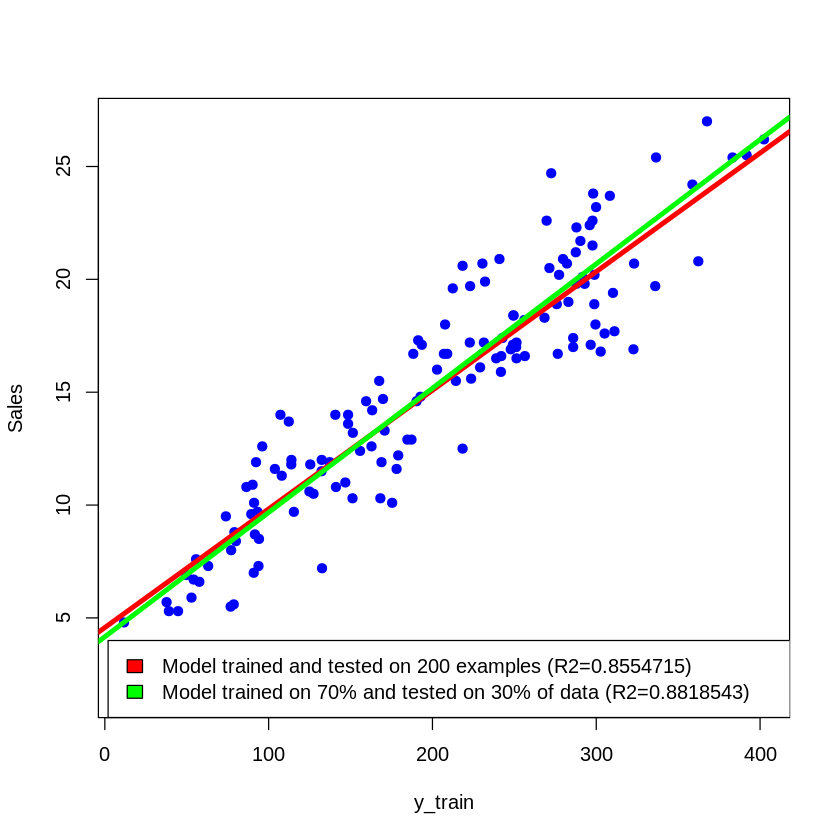

In [45]:
# plot the best fit linear models for sales vs (TV,Radio,Newspaper)

coefs2 <- coef(lm3)
coefs3 <- coef(lm4)
plot(Sales ~ (y_train), data = train,pch = 19,col="blue")
abline(coefs2, col="red",lwd=4,)
abline(coefs3, col="green",lwd=4,)
legend(2, 4, legend=c("Model trained and tested on 200 examples (R2=0.8554715)","Model trained on 70% and tested on 30% of data (R2=0.8818543)"),fill = c("red","green"))


### We can see from the plots above that there is no significant difference between the model trained and tested in 200 data and the model trained on 70% and tested on 30% data of sales vs (TV,Radio,Newspaper).

# Summary

> After conducting a linear model of Sales and TV using data from CompanyDF, we discovered that the intercept is 6.9 and the slope is 0.055. And the R2 score is 0.807, with an MSE of 5.78.
> After running a linear model of Sales and TV using training data, we discovered that the intercept is 6.9 and the slope is 0.055.
> We can observe that there is no significant difference between the model trained and tested in 200 data and the model trained on 70% and tested on 30% data after plotting the linear model.
> After conducting a linear model of Sales and (TV,Radio,Newspaper) using data from CompanyDF, we discovered that the intercept is 64.57 and the slope is 0.052. In addition, the R2 score is 0.85, and the MSE is 4.01.
> After conducting a linear model of Sales and (TV,Radio,Newspaper) using data from CompanyDF, we discovered that the intercept is 4.16 and the slope is 0.055. And the R2 score is 0.86, with an MSE of 4.15.
> From the graphs above, we can see that there is no significant difference between the model trained and tested in 200 data and the model trained and tested on 70% and tested on 30% data of sales vs. (TV,Radio,Newspaper).










